# Data Analysis with Pandas 
[link](https://www.youtube.com/watch?v=w26x-z-BdWQ&list=PLyFizHxKlcupyh5YA-3ZFKGBwjoi8zqC4&index=6)

In [284]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series, DataFrame
pd.set_option('display.mpl_style', 'default') 

#pd.set_option('display.width', 5000) 
#pd.set_option('display.max_columns', 60)

pd.options.display.max_rows = 10

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [285]:
close_px = pd.read_csv('data/stock_px.csv', index_col=0, parse_dates= True)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


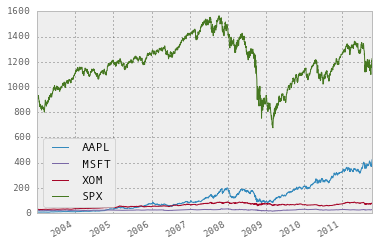

In [286]:
close_px.plot()

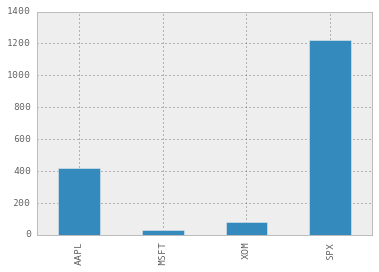

In [35]:
close_px.ix[-1].plot(kind='bar')

In [19]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
(s1+s2).head()

2011-09-12   NaN
2011-09-13   NaN
2011-09-14   NaN
2011-09-15   NaN
2011-09-16   NaN
Name: AAPL, dtype: float64

In [20]:
s1.add(s2, fill_value=0).head()

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
Name: AAPL, dtype: float64

In [21]:
df = close_px.ix[-10:, ['AAPL', 'MSFT', 'SPX']]
df

,AAPL,MSFT,SPX
2011-10-03,374.60,24.53,1099.23
2011-10-04,372.50,25.34,1123.95
2011-10-05,378.25,25.89,1144.03
2011-10-06,377.37,26.34,1164.97
2011-10-07,369.80,26.25,1155.46
2011-10-10,388.81,26.94,1194.89
2011-10-11,400.29,27.00,1195.54
2011-10-12,402.19,26.96,1207.25
2011-10-13,408.43,27.18,1203.66
2011-10-14,422.00,27.27,1224.58


In [22]:
df.mean()

AAPL     389.424
MSFT      26.370
SPX     1171.356
dtype: float64

## apply

In [28]:
df.apply(np.mean, axis=1)
#df.mean(1)

2011-10-03    499.453333
2011-10-04    507.263333
2011-10-05    516.056667
2011-10-06    522.893333
2011-10-07    517.170000
2011-10-10    536.880000
2011-10-11    540.943333
2011-10-12    545.466667
2011-10-13    546.423333
2011-10-14    557.950000
dtype: float64

In [33]:
close_px.SPX.idxmax()

Timestamp('2007-10-09 00:00:00')

### Dates

In [11]:
df = pd.DataFrame({'a': np.random.randn(6),
                   'b': ['foo', 'bar']*3, 
                   'c': np.random.randn(6)},
                     index=pd.date_range('1/1/2000', periods=6),
                     columns = ['b', 'a', 'c', 'd'])
df

,b,a,c,d
2000-01-01,foo,-0.025291,-0.148188,NaN
2000-01-02,bar,-0.906232,0.513582,NaN
2000-01-03,foo,0.367118,-0.523249,NaN
2000-01-04,bar,-0.660170,-2.313452,NaN
2000-01-05,foo,1.204531,0.129450,NaN
2000-01-06,bar,0.284837,-1.768297,NaN


# Baby names 

In [6]:
names = pd.read_csv('data/baby-names2.csv')

In [8]:
names.tail()

,year,name,prop,sex,soundex
257995,2008,Carleigh,0.000128,girl,C642
257996,2008,Iyana,0.000128,girl,I500
257997,2008,Kenley,0.000127,girl,K540
257998,2008,Sloane,0.000127,girl,S450
257999,2008,Elianna,0.000127,girl,E450


In [30]:
names[names.year == 1880]

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
...,...,...,...,...,...
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440


In [37]:
names.groupby(['year', 'sex']).size().ix[2000:2005]

year  sex 
2000  boy     1000
      girl    1000
2001  boy     1000
      girl    1000
2002  boy     1000
              ... 
2003  girl    1000
2004  boy     1000
      girl    1000
2005  boy     1000
      girl    1000
dtype: int64

In [41]:
boys = names[names.sex == 'boy']
girls = names[names.sex == 'girl']

In [50]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

#boys[boys.year == 2000].prop.idxmax()

In [51]:
get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [58]:
result =boys.groupby('year').apply(get_max_record)
result

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1881,1881,John,0.080975,boy,J500
1882,1882,John,0.078314,boy,J500
1883,1883,John,0.079066,boy,J500
1884,1884,John,0.076476,boy,J500
...,...,...,...,...,...
2004,2004,Jacob,0.013196,boy,J210
2005,2005,Jacob,0.012148,boy,J210
2006,2006,Jacob,0.011331,boy,J210


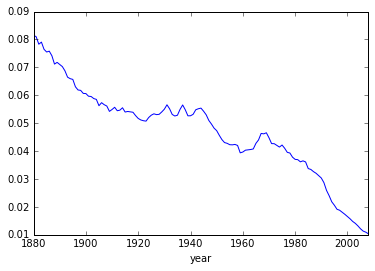

In [60]:
#proportion of names per year -> more diversity

result.prop.plot()

In [61]:
# it goes element=wise 

boys[boys.name == 'Travis']

,year,name,prop,sex,soundex
563,1880,Travis,0.000101,boy,T612
2648,1882,Travis,0.000082,boy,T612
3672,1883,Travis,0.000080,boy,T612
4656,1884,Travis,0.000081,boy,T612
5602,1885,Travis,0.000095,boy,T612
...,...,...,...,...,...
124165,2004,Travis,0.001164,boy,T612
125173,2005,Travis,0.001114,boy,T612
126162,2006,Travis,0.001186,boy,T612
127169,2007,Travis,0.001087,boy,T612


In [62]:
# so it's better to do this

idf = boys.set_index(['name', 'year'])
idf

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620
...,...,...,...,...
Kolten,2008,0.000090,boy,K435
Damari,2008,0.000089,boy,D560
Hugh,2008,0.000089,boy,H200


In [63]:
idf.ix['Travis']

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612
...,...,...,...
2004,0.001164,boy,T612
2005,0.001114,boy,T612
2006,0.001186,boy,T612


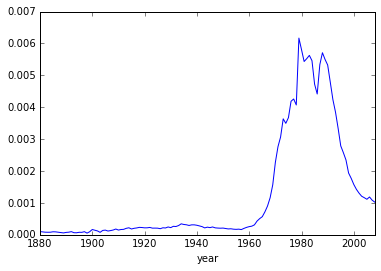

In [64]:
idf.ix['Travis'].prop.plot()

In [67]:
boys.groupby('name')['prop'].mean().sort_values()

name
Kennard     0.000027
Danniel     0.000027
Deryl       0.000028
Grayling    0.000028
Michial     0.000028
              ...   
Charles     0.019521
Robert      0.029625
William     0.034182
James       0.035465
John        0.041082
Name: prop, dtype: float64

In [75]:
result = boys.groupby('name')['prop'].describe()

In [77]:
result[:50]

name         
Aaden   count    1.000000
        mean     0.000442
        std           NaN
        min      0.000442
        25%      0.000442
                   ...   
Abbie   50%      0.000046
        75%      0.000046
        max      0.000046
Abbott  count    2.000000
        mean     0.000044
dtype: float64

In [124]:
df = boys[boys.year == 2008].sort_values(by='prop', ascending=False)

In [126]:
df.prop.cumsum()

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
            ...   
128995    0.795058
128996    0.795147
128997    0.795236
128998    0.795325
128999    0.795414
Name: prop, dtype: float64

In [137]:
# to get the 50%
int(df.prop.cumsum().searchsorted(0.5))

127

In [132]:
# writting the function to use in each year

def get_quantile_count(group, quantile=0.5):
    df = group.sort_values(by='prop', ascending=False)
    return int(df.prop.cumsum().searchsorted(quantile))

In [158]:
q = 0.5
boys_ct = boys.groupby('year').apply(get_quantile_count, quantile = q)
girls_ct = girls.groupby('year').apply(get_quantile_count, quantile = q)

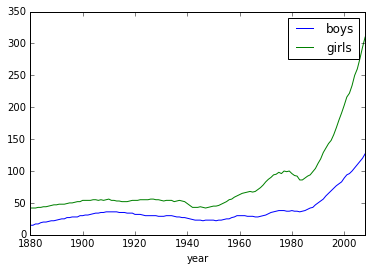

In [165]:
# people got creative choosing names in 1980's

boys_ct.plot(label= 'boys')
girls_ct.plot(label= 'girls')
plt.legend(loc= 'best')

In [167]:
grouped = boys.groupby('year')['prop']
boys['year_rank'] = grouped.transform(Series.rank)

boys

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,year,name,prop,sex,soundex,year_rank
0,1880.0,John,0.081541,boy,J500,1000.0
1,1880.0,William,0.080511,boy,W450,999.0
2,1880.0,James,0.050057,boy,J520,998.0
3,1880.0,Charles,0.045167,boy,C642,997.0
4,1880.0,George,0.043292,boy,G620,996.0
...,...,...,...,...,...,...
128996,2008.0,Damari,0.000089,boy,D560,2.5
128997,2008.0,Hugh,0.000089,boy,H200,2.5
128998,2008.0,Jensen,0.000089,boy,J525,2.5
128999,2008.0,Yurem,0.000089,boy,Y650,2.5


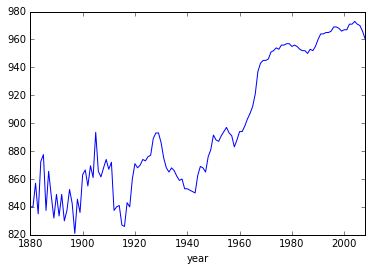

In [185]:
# rank of the names per year

idf = boys.set_index(['name', 'year'])
idf.ix['Jose'].year_rank.plot()

# Births

In [5]:
births = pd.read_csv('data/births.csv')
births

,year,sex,births
0,1880,boy,118405
1,1881,boy,108290
2,1882,boy,122034
3,1883,boy,112487
4,1884,boy,122745
...,...,...,...
255,2005,girl,2024636
256,2006,girl,2084511
257,2007,girl,2109099
258,2008,girl,2072756


## merge

In [10]:
merged = pd.merge(names, births, on=['year', 'sex'])
merged

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405
...,...,...,...,...,...,...
257995,2008,Carleigh,0.000128,girl,C642,2072756
257996,2008,Iyana,0.000128,girl,I500,2072756
257997,2008,Kenley,0.000127,girl,K540,2072756
257998,2008,Sloane,0.000127,girl,S450,2072756


In [15]:
# number of persons

merged['persons'] = np.floor(merged.prop * merged.births)
merged.head()

,year,name,prop,sex,soundex,births,persons
0,1880,John,0.081541,boy,J500,118405,9654.0
1,1880,William,0.080511,boy,W450,118405,9532.0
2,1880,James,0.050057,boy,J520,118405,5926.0
3,1880,Charles,0.045167,boy,C642,118405,5347.0
4,1880,George,0.043292,boy,G620,118405,5125.0


In [84]:
merged_name_sex = merged.groupby(['name', 'sex']).persons.sum()
merged_name_sex

name     sex 
Aaden    boy        959.0
Aaliyah  girl     39660.0
Aarav    boy        219.0
Aaron    boy     508034.0
         girl      1365.0
                   ...   
Zola     girl      4847.0
Zollie   boy         60.0
Zona     girl      3218.0
Zora     girl      4551.0
Zula     girl      3578.0
Name: persons, dtype: float64

In [85]:
merged_name_sex.sort_values()

name     sex 
Alabama  girl          3.0
Daisye   girl          3.0
Crissie  girl          3.0
Dollye   girl          3.0
Dema     girl          3.0
                   ...    
Mary     girl    4097626.0
Michael  boy     4207352.0
Robert   boy     4752198.0
John     boy     5016124.0
James    boy     5021269.0
Name: persons, dtype: float64

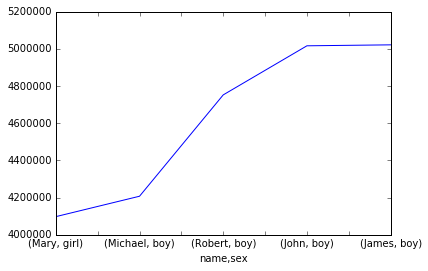

In [91]:
top_10 = merged_name_sex.sort_values()[-5:].plot()

### only boys

In [287]:
mboys = pd.merge(boys, births, on=['year', 'sex'])
mboys['persons'] = np.floor(mboys.prop * mboys.births)
persons = mboys.set_index(['year', 'name']).persons

mgirls = pd.merge(girls, births, on=['year', 'sex'])
mgirls['persons'] = np.floor(mgirls.prop * mgirls.births)
gpersons = mgirls.set_index(['year', 'name']).persons


In [288]:
persons

year  name   
1880  John       9654.0
      William    9532.0
      James      5926.0
      Charles    5347.0
      George     5125.0
                  ...  
2008  Kolten      195.0
      Damari      193.0
      Hugh        193.0
      Jensen      193.0
      Yurem       193.0
Name: persons, dtype: float64

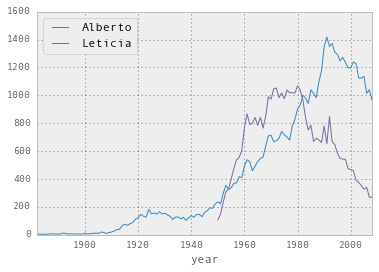

In [289]:
#persons.ix[:, 'Albert'].plot(label ='Albert')
persons.ix[:, 'Alberto'].plot(label ='Alberto')
gpersons.ix[:, 'Leticia'].plot(label ='Leticia')
plt.legend(loc= 'best')

In [290]:
# unstack the column names
persons.unstack('name')

name,Aaden,Aarav,Aaron,Ab,Abb,Abbie,Abbott,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abie,Abner,Abraham,Abram,Ace,Acey,Acie,Acy,Ada,Adalberto,Adam,Adams,Adan,Add,Addie,Addison,Adelard,...,Yoshio,Young,Yurem,Yusuf,Zachariah,Zachary,Zachery,Zack,Zackary,Zackery,Zaid,Zaiden,Zain,Zaire,Zakary,Zander,Zane,Zavier,Zayden,Zayne,Zeb,Zebulon,Zechariah,Zed,Zeke,Zenas,Zeno,Zigmund,Zion,Zollie
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,101.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,49.0,8.0,NaN,NaN,26.0,80.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,8.0,18.0,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,93.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,12.0,NaN,NaN,29.0,85.0,29.0,NaN,NaN,5.0,NaN,NaN,NaN,115.0,NaN,NaN,4.0,7.0,17.0,4.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,85.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,NaN,NaN,31.0,91.0,25.0,8.0,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,5.0,20.0,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,12.0,NaN,NaN,26.0,51.0,20.0,5.0,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,6.0,20.0,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
1884,NaN,NaN,96.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,45.0,13.0,NaN,NaN,33.0,67.0,28.0,5.0,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,7.0,16.0,6.0,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,NaN,NaN,8378.0,NaN,NaN,NaN,NaN,NaN,NaN,191.0,NaN,791.0,NaN,NaN,NaN,1982.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,7465.0,NaN,1113.0,NaN,NaN,430.0,NaN,...,NaN,NaN,NaN,172.0,615.0,13703.0,615.0,183.0,1105.0,485.0,172.0,NaN,215.0,172.0,210.0,1141.0,1455.0,179.0,NaN,NaN,NaN,NaN,307.0,NaN,NaN,NaN,NaN,NaN,1006.0,NaN
2005,NaN,NaN,7785.0,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,853.0,NaN,NaN,NaN,2035.0,430.0,NaN,NaN,NaN,NaN,NaN,NaN,6821.0,NaN,1154.0,NaN,NaN,392.0,NaN,...,NaN,NaN,NaN,182.0,664.0,12265.0,624.0,184.0,1065.0,492.0,NaN,NaN,214.0,210.0,201.0,910.0,1430.0,197.0,NaN,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,1114.0,NaN
2006,NaN,NaN,8272.0,NaN,NaN,NaN,NaN,NaN,NaN,218.0,NaN,922.0,NaN,NaN,NaN,2201.0,415.0,240.0,NaN,NaN,NaN,NaN,NaN,6765.0,NaN,1097.0,NaN,NaN,443.0,NaN,...,NaN,NaN,NaN,212.0,686.0,10978.0,524.0,198.0,996.0,419.0,NaN,NaN,227.0,247.0,220.0,1077.0,1405.0,249.0,225.0,194.0,NaN,NaN,334.0,NaN,NaN,NaN,NaN,NaN,1294.0,NaN


In [291]:
result = _

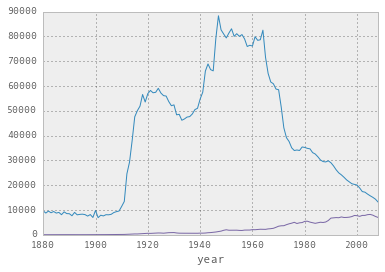

In [292]:
result['John'].plot()
result['Juan'].plot()

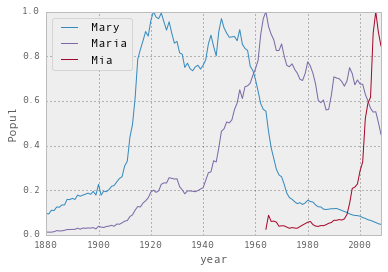

In [300]:
#persons.ix[:, 'Yurem'].plot(label ='Alberto')
(gpersons.ix[:, 'Mary']/gpersons.ix[:, 'Mary'].max()).plot(label ='Mary')
(gpersons.ix[:, 'Maria']/gpersons.ix[:, 'Maria'].max()).plot(label ='Maria')
(gpersons.ix[:, 'Mia']/gpersons.ix[:, 'Mia'].max()).plot(label ='Mia')
plt.legend(loc= 'best')
plt.ylabel('Popul')
plt.savefig('names.pdf')